# Lab Feature Extraction | Leonardo Olmos Saucedo

In [8]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get data
data = pd.read_csv('./customer_data.csv')

In [3]:
data.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879


In [4]:
# Split data into categorical and numerical
categoricals = data.select_dtypes(object)

In [5]:
numericals = data.select_dtypes(np.number)

In [7]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

1. Open the categoricals variable we created before.

In [6]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

2. Plot all the categorical variables with the proper plot. What can you see?

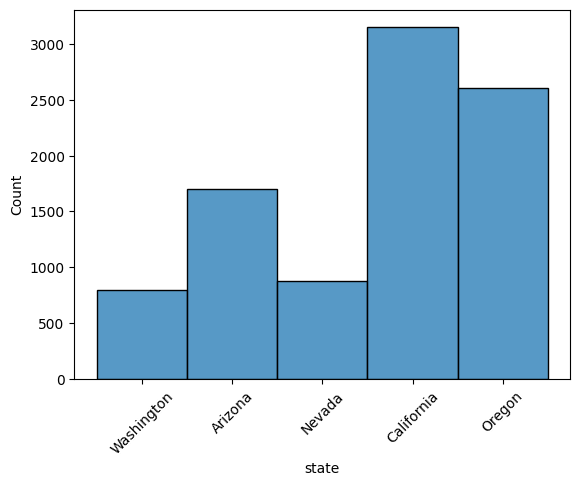

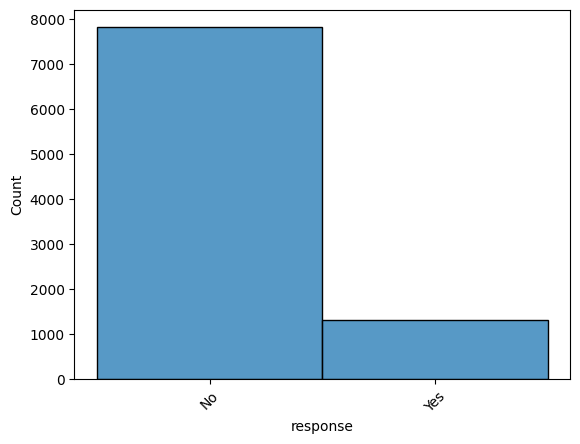

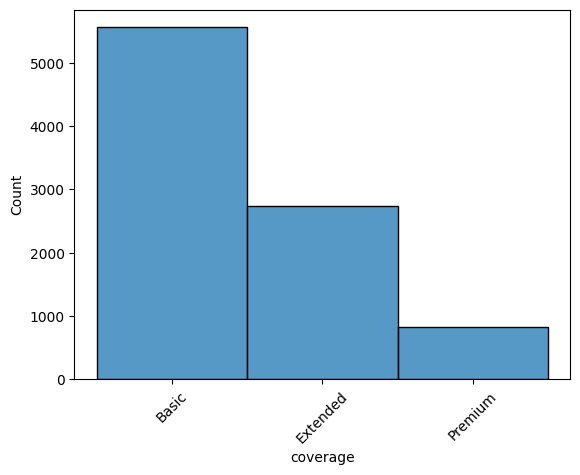

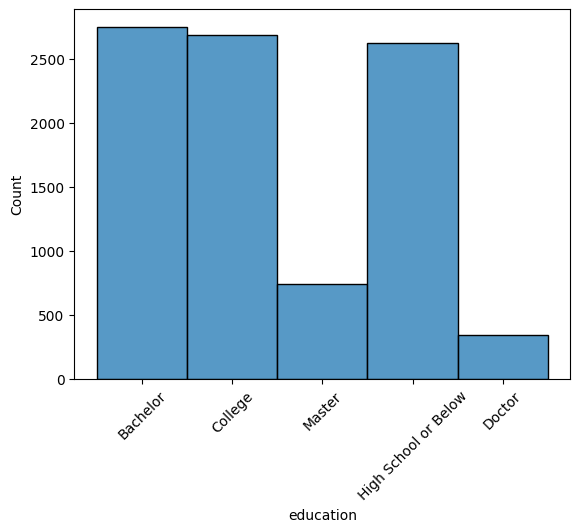

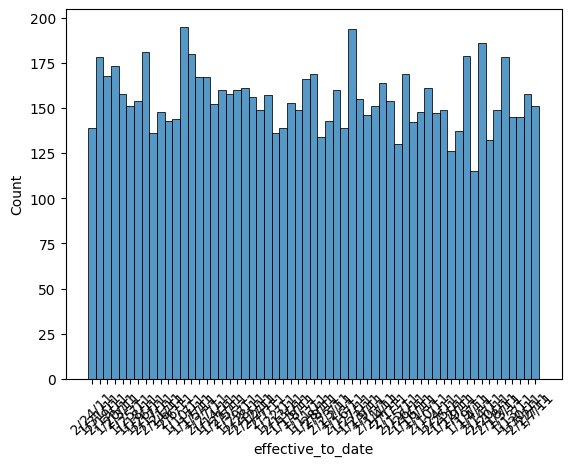

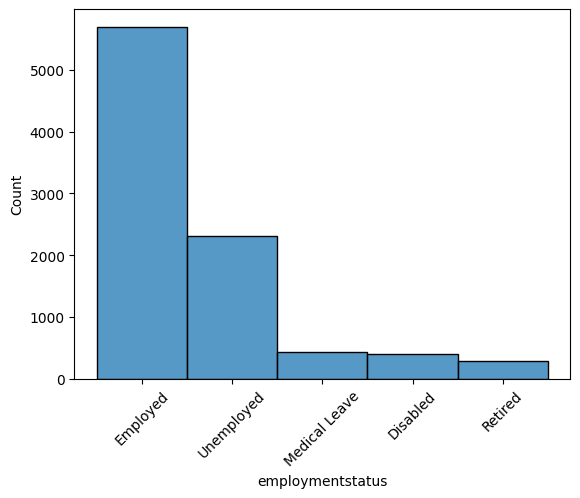

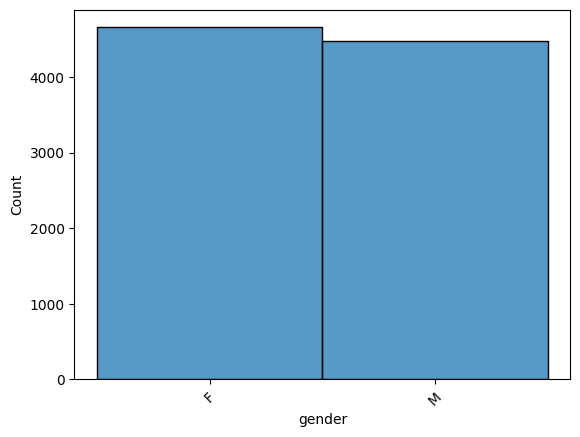

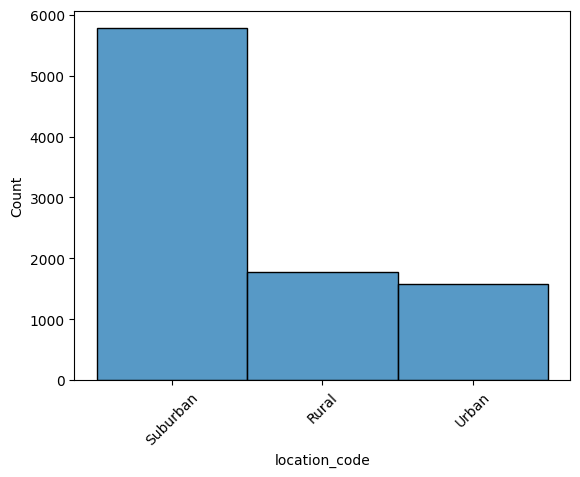

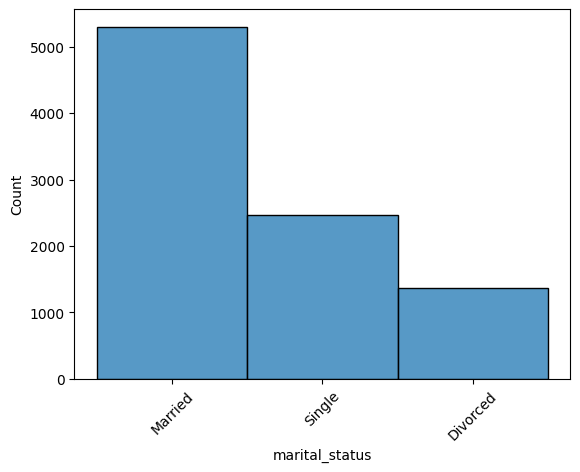

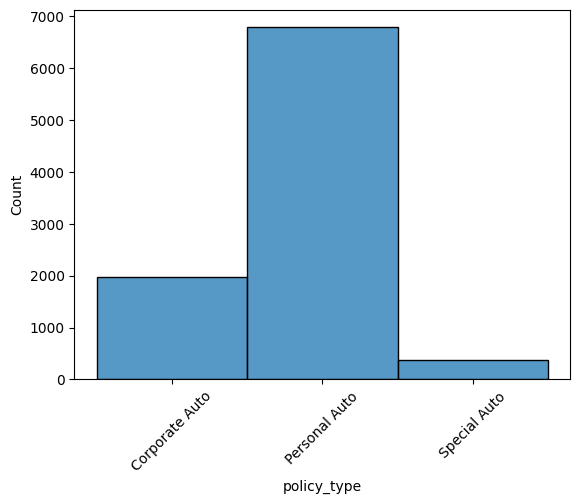

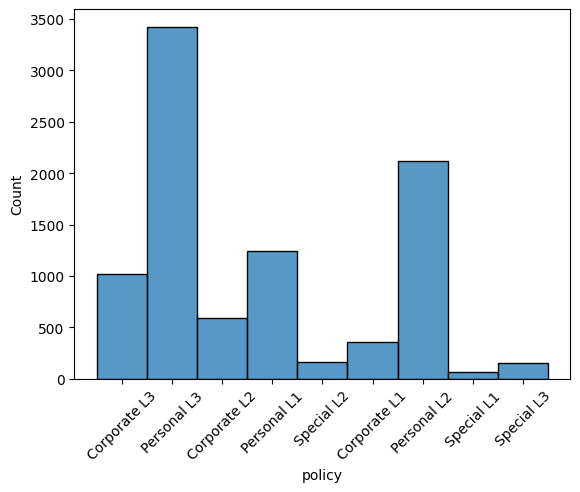

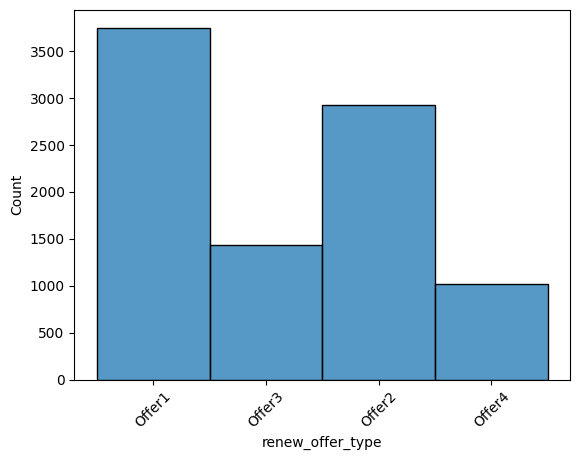

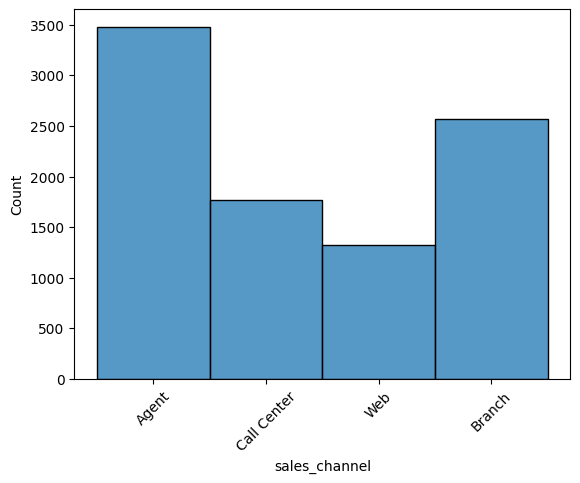

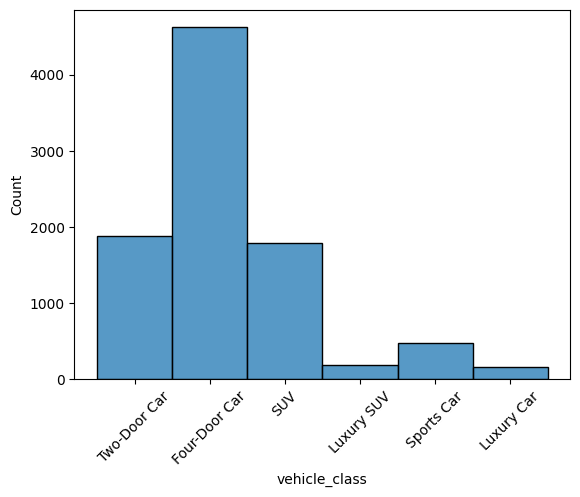

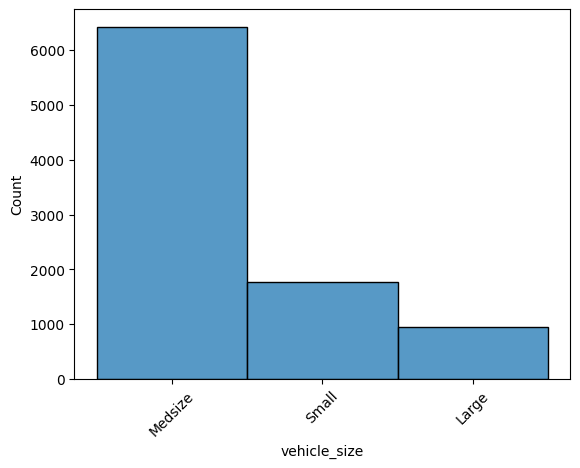

In [13]:
for column in categoricals.columns:
    sns.histplot(categoricals[column])
    plt.xticks(rotation = 45)
    plt.show()

* In almost all of our columns we have a few values but for effective to date we have a lot of values that are useless for the analysis.

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

I found redundant policy and policy_type columns, I think that we can drop one of them for the analysis, maybe we don't neeed the policy detail because is enough with policy_type.

In [39]:
categoricals.drop(columns=['policy'], inplace=True)

In [40]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month,effective_year
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,February,2011
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,January,2011
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,February,2011
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,January,2011
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,February,2011


4. Plot time variable. Can you extract something from it?

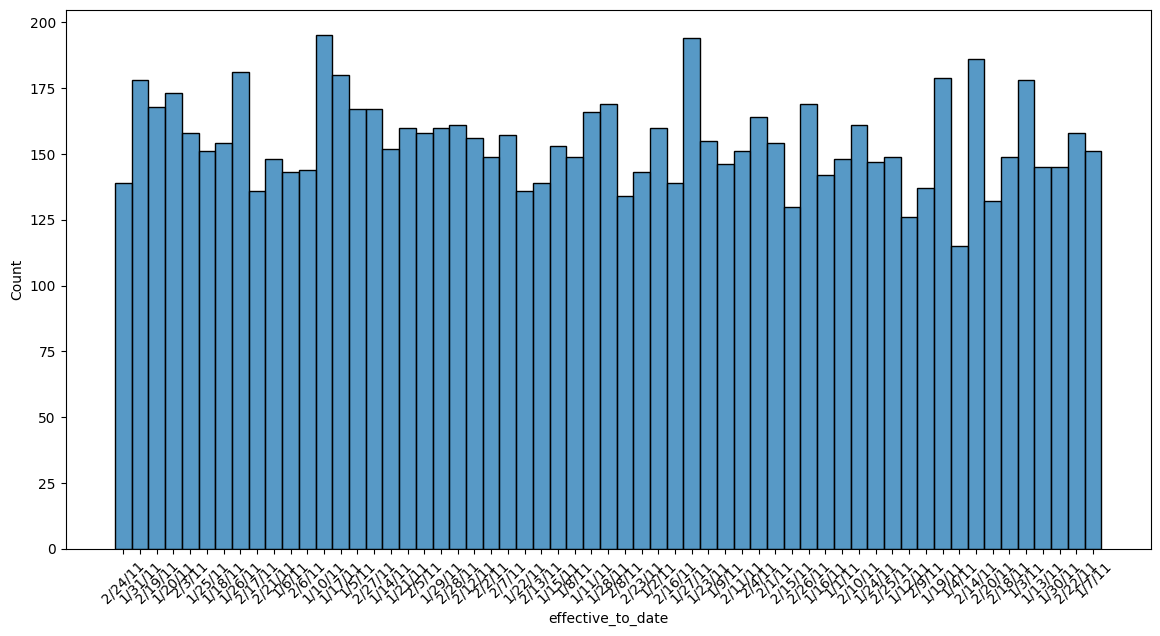

In [16]:
plt.figure( figsize=(14,7))
sns.histplot(categoricals['effective_to_date'])
plt.xticks(rotation = 45)
plt.show()

We can extract month and year form this column

In [17]:
categoricals['effective_to_date'].head()

0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: effective_to_date, dtype: object

In [28]:
from datetime import datetime
import calendar

In [ ]:
# Get month

In [31]:
def get_month(my_date):
    my_date = datetime.strptime(my_date, '%m/%d/%y')
    return calendar.month_name[my_date.month]

In [32]:
categoricals['effective_month'] = categoricals['effective_to_date'].apply(lambda x: get_month(x))

In [33]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,February
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,January
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,February
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,January
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,February


In [34]:
categoricals['effective_month'].value_counts()

effective_month
January     4898
February    4236
Name: count, dtype: int64

In [ ]:
# Get year

In [35]:
def get_year(my_date):
    my_date = datetime.strptime(my_date, '%m/%d/%y')
    return my_date.year

In [36]:
categoricals['effective_year'] = categoricals['effective_to_date'].apply(lambda x: get_year(x))

In [37]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month,effective_year
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,February,2011
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,January,2011
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,February,2011
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,January,2011
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,February,2011


In [38]:
categoricals['effective_year'].value_counts()

effective_year
2011    9134
Name: count, dtype: int64